# Logistic Regression
Jose Alberto Gonzalez Arteaga A01038061



In [479]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.linear_model import LogisticRegression

In [480]:
#Batch Gradient Descent Algorithm
def sigmoid(x):
  return 1.0 / (1 + np.exp(-x))

def lr_hypothesis(x, theta):
  return np.dot(x,theta)

#return hb_opt => 
def batchGradientDescent(X, y, b0 = 0.5, ALPHA = 0.25, max_it=5000, 
                         threshold = 1 * pow(10,-4)):
  #prepare data
  X = X.values
  y = y.values
  
  zm, zn = X.shape
  z = np.ones(zm)
  z = z.reshape(zm, 1)
  X = np.append(z,X,axis=1)

  m, n = X.shape
  theta = np.zeros(n)
  theta = theta.reshape(n,1)
  y = y.reshape(-1,1)
  diff = 1
  j = 0
  
  while j < max_it and diff > threshold:
    last_t = theta
    infunc1 = sigmoid(lr_hypothesis(X, theta)) - y
    gradient = np.dot(X.T, infunc1) / m
    theta = theta - (ALPHA / m) * gradient
    diff = np.linalg.norm(last_t-theta)
    j+=1
  return theta, j

In [481]:
#Testing functions

#return if classify in 1 or 0.
def classify(x):
  return int(x > 0.5)

#compare data
def compare(y_hat, y):
  return np.where(y_hat == y, 0, 1)

#return error
def error(y_hat, y, T):
  return 1 / T * sum(compare(y_hat, y))

#Apply model with values to predict probability of 1.
def predict(model, X):
  X = X.values
  X = np.insert(X, 0, 1.0)
  return sigmoid(np.dot(model.T, X))


## Gender:

Gender dataset classify if is Male or Female considering next args:
*   Weight
*   Height

using Batch Gradient Descent



In [482]:
#read data
name_file = input('Give name of the gender case file with (.txt):')
gender_data = pd.read_csv(name_file)

Give name of the gender case file with (.txt):Gender.txt


### Exploratory data analysis (gender)

In [483]:
#inspect randomly data
gender_data.sample(n=5)

,Gender,Height,Weight
7962,Female,62.867244,161.268395
8693,Female,64.973919,146.576103
1575,Male,71.865845,203.488801
2878,Male,65.513907,162.729848
9587,Female,60.144261,111.190708


In [484]:
#Describe variables
gender_data.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [485]:
#Any missed values
gender_data.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

### Preprocessing data (gender)

In [486]:
#Change categorical variable to numerical.
gender_data = pd.get_dummies(gender_data, columns=['Gender'])
del gender_data['Gender_Male']
gender_data.head()

,Height,Weight,Gender_Female
0,73.847017,241.893563,0
1,68.781904,162.310473,0
2,74.110105,212.740856,0
3,71.730978,220.042470,0
4,69.881796,206.349801,0


In [487]:
# Split in train / test data
# X => Gender_Female => (Male=0, Female=1)
# y => (Height, Weight) 
X = gender_data[['Height','Weight']]
y = gender_data['Gender_Female']
t_size = float(input('Give value of split test size (ex. 0.2): '))
rand_num = int(input('Give value of initial random generator: '))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=rand_num)

Give value of split test size (ex. 0.2): 0.2
Give value of initial random generator: 32


### Logistic Regression Gender

In [488]:
#train model
#parms:
# X => X_train model data
# y => y_train model data
print('Gender dataset: batch Gradient Descent Algorithm')
b_init = float(input('Give value of beta init (0,1): '))
ALPHA = float(input('Give value of ALPHA (0,1): '))
max_it = int(input('Give value of the limit of iterations: '))
threshold = float(input('Give value of threshold (ex. 0.0001): '))
model, j = batchGradientDescent(X_train, y_train, b_init, ALPHA, max_it, threshold)
print('B vector: ')
print(model)
print('iterations: ', j)

Gender dataset: batch Gradient Descent Algorithm
Give value of beta init (0,1): 0.5
Give value of ALPHA (0,1): 0.5
Give value of the limit of iterations: 1000
Give value of threshold (ex. 0.0001): 0.0001
B vector: 
[[ 0.00225289]
 [ 0.10711157]
 [-0.04505359]]
iterations:  788


In [489]:
#Test model

#predict values
y_predicted_value = X_test.apply(lambda x: predict(model, x), axis=1)
#Classify values
y_predicted = y_predicted_value.apply(classify)
#error
print('error: ', error(y_predicted, y_test, y_predicted.size))

error:  0.0925


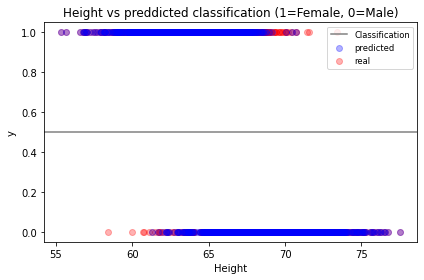

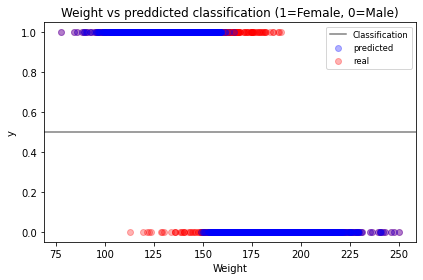

In [490]:
#plot height
plt.clf()
plt.title("Height vs preddicted classification (1=Female, 0=Male)")
plt.scatter(X_test['Height'], y_predicted, color='blue', zorder=5, alpha=0.3)
plt.scatter(X_test['Height'], y_test, color='red', zorder=2, alpha=0.3)
plt.ylabel('y')
plt.xlabel('Height')
plt.axhline(.5, color='.5')
plt.legend(('Classification', 'predicted', 'real'), fontsize='small')
plt.tight_layout()
plt.show()
#plot weight
plt.clf()
plt.title("Weight vs preddicted classification (1=Female, 0=Male)")
plt.scatter(X_test['Weight'], y_predicted, color='blue', zorder=5, alpha=0.3)
plt.scatter(X_test['Weight'], y_test, color='red', zorder=2, alpha=0.3)
plt.ylabel('y')
plt.xlabel('Weight')
plt.axhline(.5, color='.5')
plt.legend(('Classification', 'predicted', 'real'), fontsize='small')
plt.tight_layout()
plt.show()

In [491]:
#Logistic Regression with SciKit-Learn
model = LogisticRegression()
model.fit(X_train, y_train)
print("coef with SciKit-Learn model:", model.coef_)
print("bias with SciKit-Learn model:", model.intercept_)

coef with SciKit-Learn model: [[ 0.49056802 -0.20180415]]
bias with SciKit-Learn model: [0.01027737]


In [492]:
#error with SciKit-Learn
y_hat = model.predict(X_test)
print('error with SciKit-Learn model:', error(y_hat, y_test, y_hat.size))

error with SciKit-Learn model: 0.0835


In [493]:
#Create dateframe and save in file
y_predicted=y_predicted.rename('y_predicted')
y_test = y_test.rename('y_real')
y_predicted_value = y_predicted_value.rename("success rate")
df = pd.concat([X_test, y_predicted, y_test, y_predicted_value], axis=1)
df.to_csv('results'+name_file[:-4]+".csv")

## Credit Card Default:
Credit Card Default dataset
Identify if the user will pay the credit card considering next parms:

* ID: Customer id.
* Default: Yes/No if the customer will pay.
* Student: Yes/No if the customer is student.
* Balance: Average money in the credit card after their monthly pay.
* Income: Income of the customer.

Using logistic regression.

In [494]:
#Import dataset (Need to be in the project directory)
#read data
name_file = input('Give name of the credit case file with (.txt):')
credit_data = pd.read_csv(name_file, sep='\t')

Give name of the credit case file with (.txt):Default.txt


### Exploratory data analysis

In [495]:
#Inspect data
credit_data.sample(n=5)

,default,student,balance,income
5502,No,No,379.603563,42862.488888
7490,Yes,Yes,2117.120614,12143.474804
117,No,No,271.551438,32850.120145
6083,No,No,867.629483,43091.935988
8059,No,Yes,1372.978032,10776.444285


In [496]:
#Describe data
credit_data.describe()

,balance,income
count,10000.000000,10000.000000
mean,835.374886,33516.981876
std,483.714985,13336.639563
min,0.000000,771.967729
25%,481.731105,21340.462903
50%,823.636973,34552.644802
75%,1166.308386,43807.729272
max,2654.322576,73554.233495


In [497]:
#Any missed values
credit_data.isnull().sum()

default    0
student    0
balance    0
income     0
dtype: int64

### Pre-processing data

In [498]:
#Change categorical variable to numerical.
credit_data = pd.get_dummies(credit_data, columns=['student', 'default'])
del credit_data['student_No']
del credit_data['default_No']
credit_data.head()

,balance,income,student_Yes,default_Yes
1,729.526495,44361.625074,0,0
2,817.180407,12106.134700,1,0
3,1073.549164,31767.138947,0,0
4,529.250605,35704.493935,0,0
5,785.655883,38463.495879,0,0


In [502]:
# Split in train / test data
# X => Gender_Female => (Male=0, Female=1)
# y => (Height, Weight) 
X = credit_data[['student_Yes','balance', 'income']]
y = credit_data['default_Yes']
t_size = float(input('Give value of split test size (ex. 0.2): '))
rand_num = int(input('Give value of initial random generator: '))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size, random_state=rand_num)

Give value of split test size (ex. 0.2): 0.2
Give value of initial random generator: 42


### Logistic Regression: Credit data

In [504]:
#train model
#parms:
# X => X_train model data
# y => y_train model data
print('Credit dataset: batch Gradient Descent Algorithm')
b_init = float(input('Give value of beta init (0,1): '))
ALPHA = float(input('Give value of ALPHA (0,1): '))
max_it = int(input('Give value of the limit of iterations: '))
threshold = float(input('Give value of threshold (ex. 0.0001): '))
model, j = batchGradientDescent(X_train, y_train, b_init, ALPHA, max_it, threshold)
print('B vector: ')
print(model)
print("iterations: ", j)

Credit dataset: batch Gradient Descent Algorithm
Give value of beta init (0,1): 0.5
Give value of ALPHA (0,1): 0.5
Give value of the limit of iterations: 10000
Give value of threshold (ex. 0.0001): 0.0001


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


B vector: 
[[-0.00818367]
 [-0.0102958 ]
 [ 0.52550395]
 [-0.60748641]]
iterations:  10000


In [505]:
#Test model

#predict values
y_predicted_value = X_test.apply(lambda x: predict(model, x), axis=1)
#Classify values
y_predicted = y_predicted_value.apply(classify)
#error
print('Error: ', error(y_predicted, y_test, y_predicted.size))

Error:  0.0345


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until


In [506]:
#Create dateframe and save in file
y_predicted=y_predicted.rename('y_predicted')
y_test = y_test.rename('y_real')
y_predicted_value = y_predicted_value.rename("success rate")
df = pd.concat([X_test, y_predicted, y_test, y_predicted_value], axis=1)
df.to_csv('results'+name_file[:-4]+".csv")